###Euron 중급세션 2주차 캐글 필사 과제

####출처: https://www.kaggle.com/code/kanncaa1/deep-learning-tutorial-for-beginners

###Introduction
- **Deep learning**: One of the machine learning technique that learns features directly from data.
- **Why deep learning**: When the amount of data is increased, machine learning techniques are insufficient in terms of performance and deep learning gives better performance like accuracy.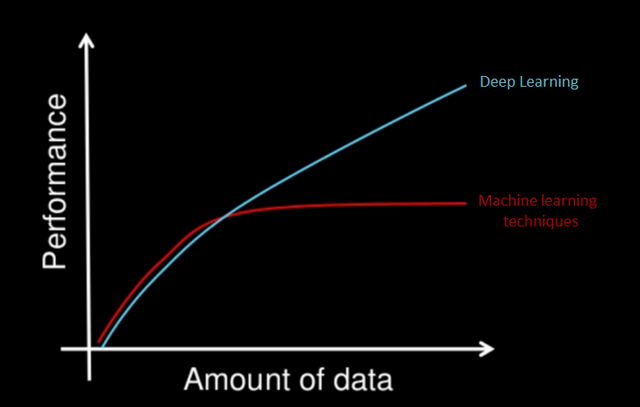

- **What is amounth of big**: It is hard to answer but intuitively 1 million sample is enough to say "big amount of data."
- **Usage fields of deep learning**: Speech recognition, image classification, natural language procession(nlp) or recommendation systems
- **What is difference of deep learning from machine learning**:
  - Machine learning covers deep learning.
  - Features are given machine learning manually.
  - On the other hand, deep learning learns features directly from data.

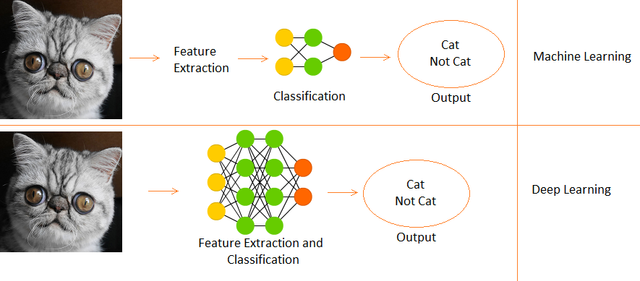

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from subprocess import check_output
print(check_output(["ls", "./input"]).decode("utf8")) # any result you write to the currenct directory are saved as output.
# 경로 ../input -> ./input으로 수정

Sign-language-digits-dataset



###Overview the Data Set
- We will use "sign language digits data set"
- 2062 sign language digits images
- digits are from 0 to 9. 10 unique sign
- At the beginning, we will use only sign 0 and 1 for simplicity
- We wi1l use 205 samples from each classes(labels).
- Lets prepare our X and Y arrays. X is image array(zero and one signs) and Y is label array(0 and 1)

(-0.5, 63.5, 63.5, -0.5)

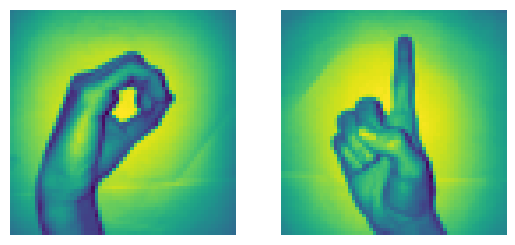

In [3]:
#load data set
x_l = np.load('./input/Sign-language-digits-dataset/X.npy')
Y_l = np.load('./input/Sign-language-digits-dataset/Y.npy')
img_size = 64
plt.subplot(1, 2, 1)
plt.imshow(x_l[260].reshape(img_size, img_size))
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(x_l[900].reshape(img_size, img_size))
plt.axis('off')

- In order to create image array, I concatenate zero sign and one sign arrays
- Then I create label array 0 for zero sign images and 1 for one sign images.

In [4]:
X = np.concatenate((x_l[204:409], x_l[822:1027]), axis=0)
z = np.zeros(205)
o = np.ones(205)
Y = np.concatenate((z, o), axis=0).reshape(X.shape[0], 1)
print("X shape: ", X.shape)
print("Y shape: ", Y.shape)

X shape:  (410, 64, 64)
Y shape:  (410, 1)


- The shape of the X is (410, 64, 64)
  - 410 means that we have 410 images (zero and one signs)
  - 64 means that our image size is 64*64(pixel)
- The shape of the Y is (410, 1)
  - 410 means that we have 410 labels (0 and 1)
- Lets split X and Y into train and test sets.
  - test_size = percentage of test size. test = 15% and train = 75%
  - random_state = use same seed while randomizing. It means that if we call train_test_split repeatedly, it always creates same train and test distribution because we have same random_state.

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state = 42)
number_of_train = X_train.shape[0]
number_of_test = X_test.shape[0]

- Now we have 3 dimensional input array (X) so we need to make it flatten (2D) in order to use as input for our first deep learning model.
- Our label array (Y) is already flatten(2D) so we leave it like that.
- Lets flatten X array(images array).

In [6]:
X_train_flatten = X_train.reshape(number_of_train, X_train.shape[1]*X_train.shape[2])
X_test_flatten = X_test.reshape(number_of_test, X_test.shape[1]*X_test.shape[2])
print("X train flatten", X_train_flatten.shape)
print("X test flatten", X_test_flatten.shape)

X train flatten (348, 4096)
X test flatten (62, 4096)


- As you can see, we have 348 images and each image has 4096 pixels in image train array.
- Als, we have 62 images and each image has 4096pixels in image test array.
- Then lets take transpose. You can say that why, but actually there is no technical answer. I just write the code accordning to it

In [7]:
x_train = X_train_flatten.T
x_test = X_test_flatten.T
y_train = Y_train.T
y_test = Y_test.T
print("x train: ", x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (4096, 348)
x test:  (4096, 62)
y train:  (1, 348)
y test:  (1, 62)


What we did up to this point:
- choose our labels that are sign zero and sign one
- create and flatten train and test sets
- our final inputs(images) and outputs looks like this:
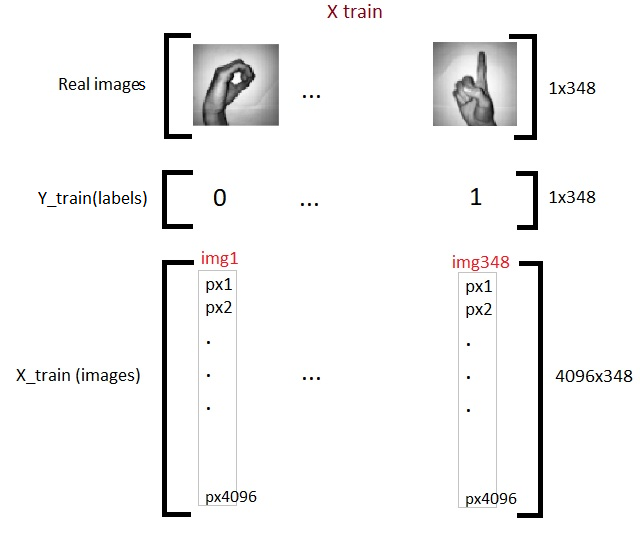

### Logistic Regression
- When we talk about binary classification(0 and 1 outputs) what comes to mind first is logistic regression.
- However, in deep learning tutorial what to do with logistic regression there?
- The answer is that logistic regression is actually a very simple neural network.
- By the way neural network and deep learning are same thing. When we will come artificial neural network, I will explain detailed the terms like "deep".
- In order to understand logistic regression(simple DL) lets first learn computation graph.

###Computation Graoh
- Computation graphs are a nice way to think about mathematical expressions.
- It is like visualization of mathematical expressions.
- For example we have c=√(a^2+b^2)
- It's computational graph is this. As you can see we express math with graph.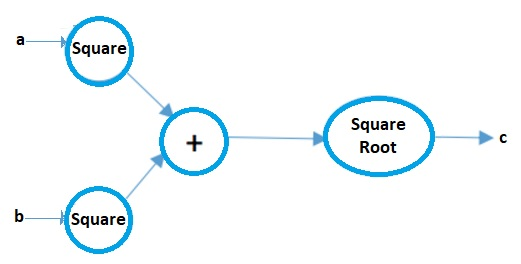
- Not lets look at computation graph of logistic regression
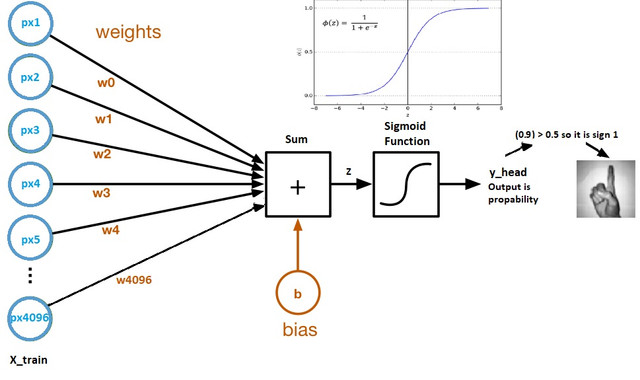
  - Parameters are weight and bias.
  - Weights: coefficients of each pixels
  - Bias: intercept
  - z = (w.t)x + b => z equals to (transpose of weights times input x) + bias
  - In an other saying => z = b + px1w1 + px2w2 + ... + px4096*w4096
  - y_head = sigmoid(z)
  - Sigmoid function makes z between zero and one so that is probability. You can see sigmoid function in computation graph.
- Why we use sigmoid function?
  - It gives probabilistic result
  - It is derivative so we can use it in gradient descent algorithm
- Lets make example:
  - Lets say we find z = 4 and put z into sigmoid function. The result(y_head) is almost 0.9. It means that our classification result is 1 with 90% probability.
- Now lets start with from beginning and examine each component of computation graph more detailed.

###Initializing parameters
- As you know input is our images that has 4096 pixels
- Each pixels have own weights.
- The first step is multiplying each pixels with their own weights.
- The question is that what is the initial value of weights?
  - There are some techniques that I will explain at artificial neural network but for this time initial weights are 0.01.
  - Okey, weights are 0.01 but what is the weight array shape? As you understand from computation graph of logistic regression, it is (4096,1)
  - lso initial bias is 0.
- Lets write some code. In order to use at coming topics like artificial neural network (ANN), I make definition(method).

In [8]:
def dummy(parameter):
  dummy_parameter = parameter + 5
  return dummy_parameter
result = dummy(3)

def initialize_weights_and_bias(dimension):
  w = np.full((dimension, 1), 0.01)
  b = 0.0
  return w, b

###Forward Propagation
- The all steps from pixels to cost is called forward propagation
  - z = (w.T)x + b => in this equation we know x that is pixel array, we know w (weights) and b (bias) so the rest is calculation. (T is transpose)
  - Then we put z into sigmoid function that returns y_head(probability). When your mind is confused go and look at computation graph. Also equation of sigmoid function is in computation graph.
  - Then we calculate loss(error) function.
  - Cost function is summation of all loss(error).
  - Lets start with z and the write sigmoid definition(method) that takes z as input parameter and returns y_head(probability)

In [9]:
def sigmoid(z):
  y_head = 1/(1+np.exp(-z))
  return y_head

In [10]:
y_head = sigmoid(0)
y_head

0.5

- As we write sigmoid method and calculate y_head. Lets learn what is loss(error) function
- Lets make example, I put one image as input then multiply it with their weights and add bias term so I find z. Then put z into sigmoid method so I find y_head. Up to this point we know what we did. Then e.g y_head became 0.9 that is bigger than 0.5 so our prediction is image is sign one image. Okey every thing looks like fine. But, is our prediction is correct and how do we check whether it is correct or not? The answer is with loss(error) function:
  - Mathematical expression of log loss(error) function is that:duzeltme
  - It says that if you make wrong prediction, loss(error) becomes big. DENKLEM DUZELTME
    - Example: our real image is sign one and its label is 1 (y = 1), then we make prediction y_head = 1. When we put y and y_head into loss(error) equation the result is 0. We make correct prediction therefore our loss is 0. However, if we make wrong prediction like y_head = 0, loss(error) is infinity.
  - After that, the cost function is summation of loss function. Each image creates loss function. Cost function is summation of loss functions that is created by each input image.
  - Lets implement forward propagation.

In [11]:
def forward_propagation(w, b, x_train, y_train):
  z = np.dot(w.T, x_train) + b
  y_head = sigmoid(z)
  loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
  cost = (np.sum(loss))/x_train.shape[1]
  return cost

###Optimization Algorithm with Gradient Descent
- Well, now we know what is our cost that is error.
- Therefore, we need to decrease cost because as we know if cost is high it means that we make wrong prediction.
- Lets think first step, every thing starts with initializing weights and bias. Therefore cost is dependent with them.
- In order to decrease cost, we need to update weights and bias.
- In other words, our model needs to learn the parameters weights and bias that minimize cost function. This technique is called gradient descent.
- Lets make an example:

  - We have w = 5 and bias = 0 (so ignore bias for now). Then we make forward propagation and our cost function is 1.5.
  - It looks like this. (red lines)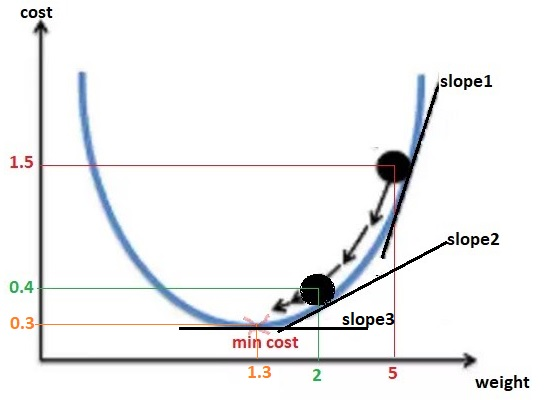
  - As you can see from graph, we are not at minimum point of cost function. Therefore we need to go through minimum cost. Okey, lets update weight. ( the symbol := is updating)
  - w := w - step. The question is what is this step? Step is slope1. Okey, it looks remarkable. In order to find minimum point, we can use slope1. Then lets say slope1 = 3 and update our weight. w := w - slope1 => w = 2.
  - Now, our weight w is 2. As you remember, we need to find cost function with forward propagation again.
  - Lets say according to forward propagation with w = 2, cost function is 0.4. Hmm, we are at right way because our cost function is decrease. We have new value for cost function that is cost = 0.4. Is that enough? Actually I do not know lets try one more step.
  - Slope2 = 0.7 and w = 2. Lets update weight w : = w - step(slope2) => w = 1.3 that is new weight. So lets find new cost.
  - Make one more forward propagation with w = 1.3 and our cost = 0.3. Okey, our cost even decreased, it looks like fine but is it enough or do we need to make one more step? The answer is again I do not know, lets try.
  - Slope3 = 0.01 and w = 1.3. Updating weight w := w - step(slope3) => w = 1.29 ~ 1.3. So weight does not change because we find minimum point of cost function.
  - Everything looks like good but how we find slope? If you remember from high school or university, in order to find slope of function(cost function) at given point(at given weight) we take derivative of function at given point. Also you can ask that okey well we find slope but how it knows where it go. You can say that it can go more higher cost values instead of going minimum point. The asnwer is that slope(derivative) gives both step and direction of step. Therefore do not worry :)
  - Update equation is this. It says that there is a cost function(takes weight and bias). Take derivative of cost function according to weight and bias. Then multiply it with α learning rate. Then update weight. (In order to explain I ignore bias but these all steps will be applied for bias)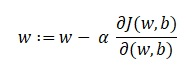
  - Now, I am sure you are asking what is learning rate that I mentioned never. It is very simple term that determines learning rate. Hovewer there is tradeoff between learning fast and never learning. For example you are at Paris(current cost) and want to go Madrid(minimum cost). If your speed(learning rate) is small, you can go Madrid very slowly and it takes too long time. On ther other hand, if your speed(learning rate) is big, you can go very fast but maybe you make crash and never go to Madrid. Therefore, we need to choose wisely our speed(learning rate).
  - Learning rate is also called hyperparameter that need to be chosen and tuned. I will explain it more detailed in artificial neural network with other hyperparameters. For now just say learning rate is 1 for our previous example.
- I think now you understand the logic behind forward propagation(from weights and bias to cost) and backward propagation(from cost to weights and bias to update them). Also you learn gradient descent. Before implementing the code you need to learn one more thing that is how we take derivative of cost function according to weights and bias. It is not related with python or coding. It is pure mathematic. There are two option first one is to google how to take derivative of log loss function and second one is even to google what is derivative of log loss function :) I choose second one because I cannot explain math without talking 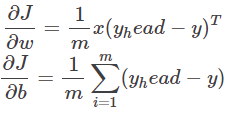

In [18]:
def forward_backward_propagation(w, b, x_train, y_train):
  z = np.dot(w.T, x_train) + b
  y_head = sigmoid(z)
  loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
  cost = (np.sum(loss))/x_train.shape[1]
  derivative_weight = (np.dot(x_train, ((y_head-y_train).T)))/x_train.shape[1]
  derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]
  gradients = {"derivative_weight": derivative_weight, "derivative_bias": derivative_bias}
  return cost, gradients

- Up to this point we learn
  - Initializing parameters (implemented)
  - Finding cost with forward propagation and cost function (implemented)
  - Updating(learning) parameters (weight and bias). Now lets implement it.

In [16]:
def update(w, b, x_train, y_train, learning_rate, number_of_iteration):
  cost_list = []
  cost_list2 = []
  index = []
  for i in range(number_of_iteration):
    cost, gradients = forward_backward_propagation(w, b, x_train, y_train)
    cost_list.append(cost)
    w = w - learning_rate * gradients["derivative_weight"]
    b = b - learning_rate * gradients["derivative_bias"]
    if i%10 == 0:
      cost_list2.append(cost)
      index.append(i)
      print("Cost after iteration %i: %f" %(i, cost))
  parameters = {"weight": w, "bias": b}
  plt.plot(index,cost_list2)
  plt.xticks(index,rotation='vertical')
  plt.xlabel("Number of Iterarion")
  plt.ylabel("Cost")
  plt.show()
  return parameters, gradients, cost_list

- Wow, I get tired :) Up to this point we learn our parameters. It means we fit the data.
- In order to predict we have parameters. Therefore, lets predict.
- In prediction step we have x_test as a input and while using it, we make forward prediction.

In [14]:
def predict(w, b, x_test):
  z = sigmoid(np.dot(w.T, x_test)+b)
  Y_prediction = np.zeros((1, x_test.shape[1]))
  for i in range(z.shape[1]):
    if z[0,i] <= 0.5:
      Y_prediction[0, i] = 0
    else:
      Y_prediction[0, i] = 1
  return Y_prediction

- We make prediction.
- Now lets put them all together.

Cost after iteration 0: 14.014222
Cost after iteration 10: 2.544689
Cost after iteration 20: 2.577950
Cost after iteration 30: 2.397999
Cost after iteration 40: 2.185019
Cost after iteration 50: 1.968348
Cost after iteration 60: 1.754195
Cost after iteration 70: 1.535079
Cost after iteration 80: 1.297567
Cost after iteration 90: 1.031919
Cost after iteration 100: 0.737019
Cost after iteration 110: 0.441355
Cost after iteration 120: 0.252278
Cost after iteration 130: 0.205168
Cost after iteration 140: 0.196168


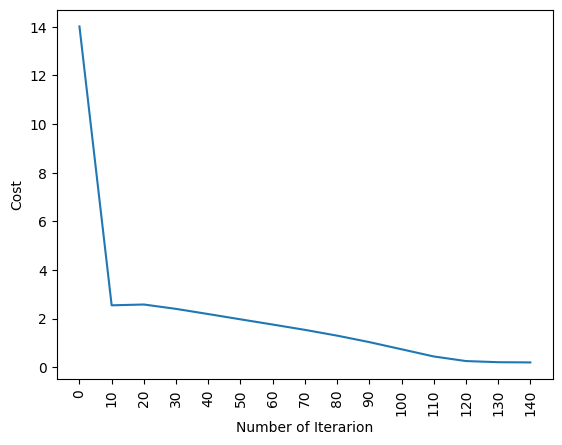

train accuracy: 92.816091954023 %
test accuracy: 93.54838709677419 %


In [19]:
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate, num_iterations):
  dimension = x_train.shape[0]
  w, b = initialize_weights_and_bias(dimension)
  parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate, num_iterations)
  y_prediction_test = predict(parameters["weight"], parameters["bias"], x_test)
  y_prediction_train = predict(parameters["weight"],parameters["bias"], x_train)
  print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
  print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))

logistic_regression(x_train, y_train, x_test, y_test,learning_rate = 0.01, num_iterations = 150)

- We learn logic behind simple neural network(logistic regression) and how to implement it.
- Now that we have learned logic, we can use sklearn library which is easier than implementing all steps with hand for logistic regression.


###Logistic Regression with Sklearn
- In sklearn library, there is a logistic regression method that ease implementing logistic regression.
- I am not going to explain each parameter of logistic regression in sklear but if you want you can read from there http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
- The accuracies are different from what we find. Because logistic regression method use a lot of different feature that we do not use like different optimization parameters or regularization.
- Lets make conclusion for logistic regression and continue with artificial neural network.

In [20]:
from sklearn import linear_model
logreg = linear_model.LogisticRegression(random_state = 42,max_iter= 150)
print("test accuracy: {} ".format(logreg.fit(x_train.T, y_train.T).score(x_test.T, y_test.T)))
print("train accuracy: {} ".format(logreg.fit(x_train.T, y_train.T).score(x_train.T, y_train.T)))

test accuracy: 0.967741935483871 
train accuracy: 1.0 


###Summary and Questions in Minds
What we did at this first part:

- Initialize parameters weight and bias
- Forward propagation
- Loss function
- Cost function
- Backward propagation (gradient descent)
- Prediction with learnt parameters weight and bias
- Logistic regression with sklearn

If you have any question up to this point ask me please bacause we will contruct artificial neural network on logistic regression.
HOMEWORK: Here is good place to stop and make practice. Your homework is that create your own logistic regression method and classify two different sign language digits.